In [1]:
# as this notebook is run from a subfolder, we need to change the working directory to the root folder
import os

if os.getcwd().split("/")[-1] != "explain-python":
    os.chdir("..")

# import the model engine
from explain_core.ModelEngine import ModelEngine

# instantiate a modelengine instance
model = ModelEngine()

# inject a model definition into the modelengine instance
model.load_model_definition("definitions/baseline_neonate.json")

# import the general mode interface and instantiate it with the current model object
from explain_core.interfaces.BaseInterface import BaseInterface

# instantiate a custom interface object especially designed to interact with the neonatal model engine instance
io = BaseInterface(model)

/opt/homebrew/Cellar/pypy3.10/7.3.15/libexec/lib/pypy3.10/site-packages/setuptools-59.8.0-py3.10.egg/setuptools/dist.py:723: UserWarning: Usage of dash-separated 'install-scripts' will not be supported in future versions. Please use the underscore name 'install_scripts' instead
  warnings.warn(


 Model 'baseline neonate' loaded and initialized correctly.


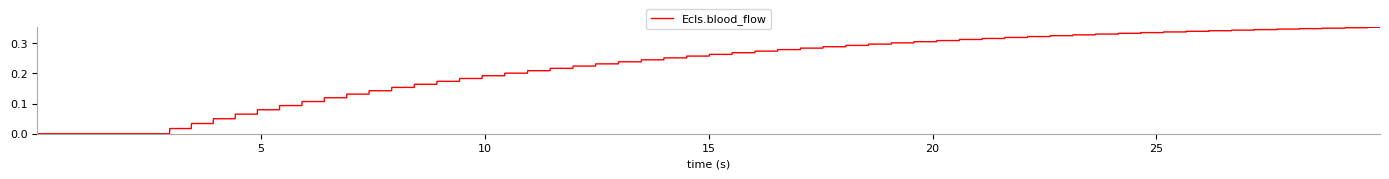

Ecls.blood_flow : max    0.35215 min        0.0


In [2]:
model.models["Ecls"].switch_ecls(True)
model.models["Ecls"].pump_rpm = 2000
model.models["Ventilator"].switch_ventilator(True)
model.models["Ventilator"].set_ventilator_pc()
pressures = io.plot_time_graph(
    ["Ecls.blood_flow"],
    autoscale=True,
    fill=False,
    combined=False,
    sharey=False,
    time_to_calculate=30,
)

In [3]:
io.calculate(30)

 Ready in 3.6 sec. Average model step in 0.0605 ms.


In [10]:
model.models["Ecls"].switch_ecls(False)
model.models["Ventilator"].switch_ventilator(False)
io.calculate(30)

 Ready in 3.3 sec. Average model step in 0.0555 ms.


In [3]:
from explain_core.cpp_models._blood_composition.lib import GetBloodComposition

In [3]:
import explain_core.cpp_models._blood_composition

In [5]:
explain_core.cpp_models._blood_composition.lib.GetBloodComposition(model.models["AA"])

TypeError: GetBloodComposition() takes exactly 9 arguments (1 given)